# Applied Data Science Capstone Project - 
## Predicting the Occurrence of High Severity Level Road Accident

### Introduction: Businss Problem:
Traffic congestion is a big problem for all countries, especially in big cities. The problem become serious because of high volume of vehicles and the development of population. Traffic congestion always happens when there is a road accident. The higher severity level the accident is, the longer time the congestion lasted for. It normally takes hours to clean the road and release the traffic. Drivers need to wait, and it is not easy to change their travel path when they are already suffering from it. The most effective solution is aware the road condition, route to other path before you were suffering from a traffic jam.

In this project, the collision data from Seattle will be used to study and predict the happens of a high severity level road accident. It provides a warning to driver to take actions before suffering from a traffic congestion.

### Data

Coursera shares the data which are downloaded from Seattle government’s open data platform. The data includes all types of collisions from 2004 to 2020-May. There are total 195K collision records with 37 variables. The data contains many useful information including the severity level, the accident datetime, collision type, weather condition, road condition, the number of vehicles involved, the number of pedestrians involved, etc. 

To predict the occurrence of a high severity level accident. The variable “SEVERITYCODE” is selected as our target variable. 

There are two available values “1 – prop damage” and “2 – injury”. In this project will define “2 – injury” as a high-level severity road accident and predict its occurrence.

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt 

In [3]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_4355769e00a84a8bab80fc5828988392 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='CjIHn30Umq5lgY-mh9VXXUGYy_NAEoWG58SY_2nWZVcI',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_4355769e00a84a8bab80fc5828988392.get_object(Bucket='courseraibmmachinelearningwithpyt-donotdelete-pr-u19zlrstius5lq',Key='Data-Collisions.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
df_data_1.shape

(194673, 38)

In [5]:
# Unbalanced Data
df_data_1['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

## Traget Variable Distribution

In [8]:
counts=df_data_1['SEVERITYCODE'].value_counts(dropna=False)
percent=df_data_1['SEVERITYCODE'].value_counts(dropna=False,normalize=True)
percent100=df_data_1['SEVERITYCODE'].value_counts(dropna=False,normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100})
# It is an unbalanced dataset

,counts,per,per100
1,136485,0.701099,70.1%
2,58188,0.298901,29.9%


The “2 – injury” only occupies 30% of the total records which shows it is an unbalanced data.  
Data balancing may need to be performed before building a predictive model.

## Preliminary study of varaibles with NaN varibales

In [9]:
counts=df_data_1['EXCEPTRSNCODE'].value_counts(dropna=False)
percent=df_data_1['EXCEPTRSNCODE'].value_counts(dropna=False,normalize=True)
percent100=df_data_1['EXCEPTRSNCODE'].value_counts(dropna=False,normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100})
# Over 96% with NaN and missing value. Drop the variable.

,counts,per,per100
NaN,109862,0.564341,56.4%
,79173,0.406697,40.7%
NEI,5638,0.028961,2.9%


In [10]:
counts=df_data_1['EXCEPTRSNDESC'].value_counts(dropna=False)
percent=df_data_1['EXCEPTRSNDESC'].value_counts(dropna=False,normalize=True)
percent100=df_data_1['EXCEPTRSNDESC'].value_counts(dropna=False,normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100})
# Over 97% with NaN value, Drop the variable.

,counts,per,per100
NaN,189035,0.971039,97.1%
"Not Enough Information, or Insufficient Location Information",5638,0.028961,2.9%


In [11]:
counts=df_data_1['INATTENTIONIND'].value_counts(dropna=False)
percent=df_data_1['INATTENTIONIND'].value_counts(dropna=False,normalize=True)
percent100=df_data_1['INATTENTIONIND'].value_counts(dropna=False,normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100})
# The variable is an indicator, change NaN value to 'N'

,counts,per,per100
NaN,164868,0.846897,84.7%
Y,29805,0.153103,15.3%


In [12]:
df_data_1['INATTENTIONIND'].fillna('N',  inplace=True)
counts=df_data_1['INATTENTIONIND'].value_counts(dropna=False)
percent=df_data_1['INATTENTIONIND'].value_counts(dropna=False,normalize=True)
percent100=df_data_1['INATTENTIONIND'].value_counts(dropna=False,normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100})

,counts,per,per100
N,164868,0.846897,84.7%
Y,29805,0.153103,15.3%


In [13]:
counts=df_data_1['PEDROWNOTGRNT'].value_counts(dropna=False)
percent=df_data_1['PEDROWNOTGRNT'].value_counts(dropna=False,normalize=True)
percent100=df_data_1['PEDROWNOTGRNT'].value_counts(dropna=False,normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100})
# The variable is an indicator, change NaN value to 'N'

,counts,per,per100
NaN,190006,0.976026,97.6%
Y,4667,0.023974,2.4%


In [14]:
df_data_1['PEDROWNOTGRNT'].fillna('N',  inplace=True)
counts=df_data_1['PEDROWNOTGRNT'].value_counts(dropna=False)
percent=df_data_1['PEDROWNOTGRNT'].value_counts(dropna=False,normalize=True)
percent100=df_data_1['PEDROWNOTGRNT'].value_counts(dropna=False,normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100})

,counts,per,per100
N,190006,0.976026,97.6%
Y,4667,0.023974,2.4%


In [15]:
counts=df_data_1['SPEEDING'].value_counts(dropna=False)
percent=df_data_1['SPEEDING'].value_counts(dropna=False,normalize=True)
percent100=df_data_1['SPEEDING'].value_counts(dropna=False,normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100})
# The variable is an indicator, change NaN value to 'N'

,counts,per,per100
NaN,185340,0.952058,95.2%
Y,9333,0.047942,4.8%


In [16]:
df_data_1['SPEEDING'].fillna('N',  inplace=True)
counts=df_data_1['SPEEDING'].value_counts(dropna=False)
percent=df_data_1['SPEEDING'].value_counts(dropna=False,normalize=True)
percent100=df_data_1['SPEEDING'].value_counts(dropna=False,normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100})

,counts,per,per100
N,185340,0.952058,95.2%
Y,9333,0.047942,4.8%


In [17]:
# Drop the variables with majority NaN values 
del df_data_1['INTKEY']
del df_data_1['EXCEPTRSNCODE']
del df_data_1['EXCEPTRSNDESC']

In [18]:
df=df_data_1.dropna()
df.shape

(109422, 35)

There are some variables with >=80% records contain NaN or missing value.   
Some of them are indicator variables and the rest of them are not.   
We can identify them based on the distribution of the available values and their business meaning.   

* For the indicator variables, we will keep the inductor with its original value “Y” and impute the NaN values to “N”.   
* For the rest of NaN variables, we will drop them from our dataset because they are not informative and should not be selected as the predictors in our model.  

## Traget Variable Distribution - NaN variables removed

In [19]:
counts=df['SEVERITYCODE'].value_counts(dropna=False)
percent=df['SEVERITYCODE'].value_counts(dropna=False,normalize=True)
percent100=df['SEVERITYCODE'].value_counts(dropna=False,normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100})
# The target varible is unbalanced

,counts,per,per100
1,76677,0.700746,70.1%
2,32745,0.299254,29.9%


After dropping the columns with lots of NaN values, we can check the dataset and remove the records will NaN in the remaining variables.   
There are 109K clean records and 35 variables are left.   

The distribution of the target variables “SERVERITYCODE” is checked again.   
The “2 – injury” still occupies 30% of the total clean records which indicates the clean dataset is still an unbalanced dataset.   
Therefore, we need to perform data balance before fitting a model.  

## Categorical Variables Study  - Chi-Square Test

In [20]:
import numpy as np
from scipy import stats

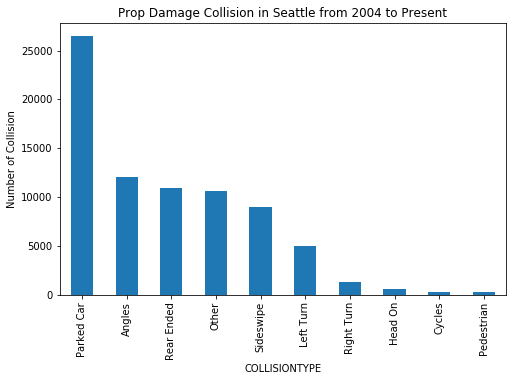

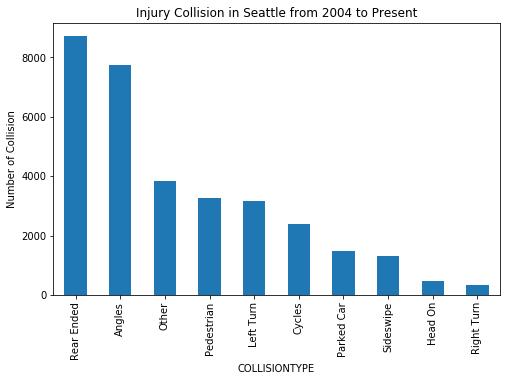

SEVERITYCODE       1     2
COLLISIONTYPE             
Angles         12045  7739
Cycles           345  2393
Head On          631   485
Left Turn       4958  3152
Other          10679  3843
Parked Car     26479  1490
Pedestrian       308  3276
Rear Ended     10909  8722
Right Turn      1350   334
Sideswipe       8973  1311

significance=0.050, p=0.000
Dependent (reject H0)


In [21]:
# COLLISIONTYPE

# plot bar chart
df_bar1=df[df['SEVERITYCODE']==1]['COLLISIONTYPE'].value_counts(dropna=False)
df_bar1.plot(kind='bar', figsize=(8, 5))
plt.xlabel('COLLISIONTYPE') 
plt.ylabel('Number of Collision') 
plt.title('Prop Damage Collision in Seattle from 2004 to Present')
plt.show()

df_bar2=df[df['SEVERITYCODE']==2]['COLLISIONTYPE'].value_counts(dropna=False)
df_bar2.plot(kind='bar', figsize=(8, 5))
plt.xlabel('COLLISIONTYPE') 
plt.ylabel('Number of Collision') 
plt.title('Injury Collision in Seattle from 2004 to Present')
plt.show()

# Chi-Square Test
data_crosstab = pd.crosstab(df['COLLISIONTYPE'],  df['SEVERITYCODE'], margins = False) 
print(data_crosstab) 
print("")

chi2, p_value, dof, ex = stats.chi2_contingency(data_crosstab.to_numpy(),correction=False) 
alpha = 0.05
print('significance=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)') 

From the distribution, 
* For “1 – prop damage”, the highest collision type is “Parked Car”
* For “2 – injury”, the highest collision type is “Rear Ended”  

The differences of the distribution imply that “COLLISIONTYPE” may be able to classify a high severity level accident.   
Then, a Chi-Square test is performed to proof our hypothesis.

Chi-Square Test:
* H0: There is no relationship between “COLLISIONTYPE” and “SEVERITYCODE”.
* H1: H0 is not true.  

Chi-Square test of independence is performed. The result p-value is 0.00 which are less 0.05 significant level.    
We can reject the H0 and conclude that there is a relationship between “COLLISIONTYPE” and “SEVERITYCODE”.  
“COLLISIONTYPE” will be selected as one of our predictors for model fitting.  


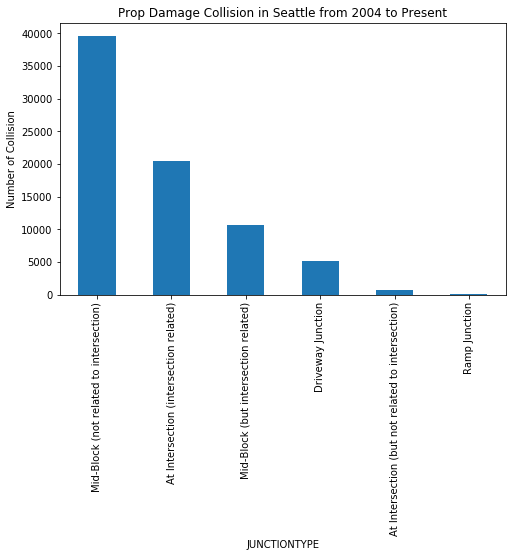

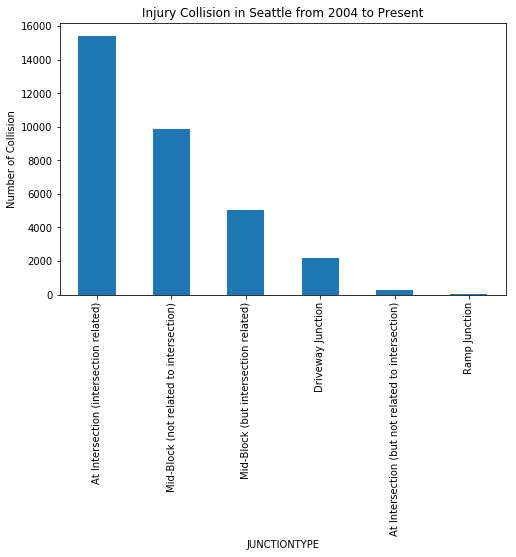

SEVERITYCODE                                           1      2
JUNCTIONTYPE                                                   
At Intersection (but not related to intersection)    717    268
At Intersection (intersection related)             20482  15418
Driveway Junction                                   5121   2170
Mid-Block (but intersection related)               10689   5036
Mid-Block (not related to intersection)            39638   9847
Ramp Junction                                         30      6

significance=0.050, p=0.000
Dependent (reject H0)


In [22]:
# JUNCTIONTYPE

# plot bar chart
df_bar1=df[df['SEVERITYCODE']==1]['JUNCTIONTYPE'].value_counts(dropna=False)
df_bar1.plot(kind='bar', figsize=(8, 5))
plt.xlabel('JUNCTIONTYPE') 
plt.ylabel('Number of Collision') 
plt.title('Prop Damage Collision in Seattle from 2004 to Present')
plt.show()

df_bar2=df[df['SEVERITYCODE']==2]['JUNCTIONTYPE'].value_counts(dropna=False)
df_bar2.plot(kind='bar', figsize=(8, 5))
plt.xlabel('JUNCTIONTYPE') 
plt.ylabel('Number of Collision') 
plt.title('Injury Collision in Seattle from 2004 to Present')
plt.show()

# Chi-Square Test
data_crosstab = pd.crosstab(df['JUNCTIONTYPE'],  df['SEVERITYCODE'], margins = False) 
print(data_crosstab) 
print("")

chi2, p_value, dof, ex = stats.chi2_contingency(data_crosstab.to_numpy(),correction=False) 
alpha = 0.05
print('significance=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)') 

From the distribution, the first and the second-high occurrence “JUNCTIONTYPE” of two “SEVERSITYCODE” are switched.
* For “1 – prop damage”, the first-highest junction type is “Mid-Block (not related to intersection)” and the second-high junction type is “At Intersection (intersection related)”.  
* For “2 – injury”, the first-highest junction type is “At Intersection (intersection related)” and the second-high junction type is “Mid-Block (not related to intersection)”.  

The differences of the distribution imply that “JUNCTIONTYPE” may also be able to classify a high severity level accident.   
Then, we can carry out a Chi-Square test to proof it.



Chi-Square Test:
* H0: There is no relationship between “JUNCTIONTYPE” and “SEVERITYCODE”.  
* H1: H0 is not true.

The result p-value is 0.00 which are less 0.05 significant level.   
We can reject the H0 and conclude that there is a relationship between “SEVERITYCODE” and “SEVERITYCODE”.  

“SEVERITYCODE” will be selected as one of our predictors for model fitting.


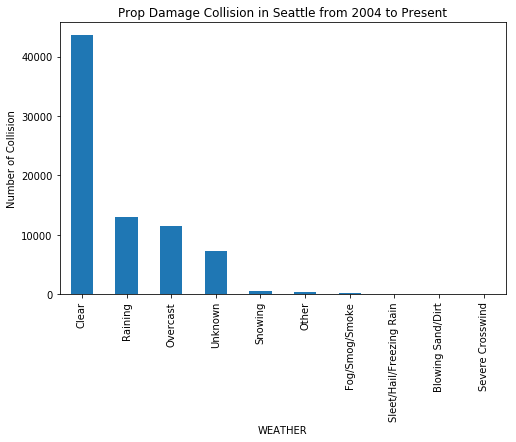

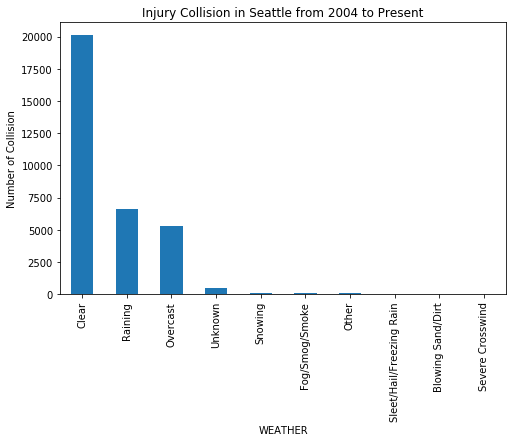

SEVERITYCODE                  1      2
WEATHER                               
Blowing Sand/Dirt            17      7
Clear                     43589  20092
Fog/Smog/Smoke              196     87
Other                       447     65
Overcast                  11530   5271
Raining                   13022   6583
Severe Crosswind              8      3
Sleet/Hail/Freezing Rain     67     21
Snowing                     488    114
Unknown                    7313    502

significance=0.050, p=0.000
Dependent (reject H0)


In [23]:
# WEATHER

# plot bar chart
df_bar1=df[df['SEVERITYCODE']==1]['WEATHER'].value_counts(dropna=False)
df_bar1.plot(kind='bar', figsize=(8, 5))
plt.xlabel('WEATHER') 
plt.ylabel('Number of Collision') 
plt.title('Prop Damage Collision in Seattle from 2004 to Present')
plt.show()

df_bar2=df[df['SEVERITYCODE']==2]['WEATHER'].value_counts(dropna=False)
df_bar2.plot(kind='bar', figsize=(8, 5))
plt.xlabel('WEATHER') 
plt.ylabel('Number of Collision') 
plt.title('Injury Collision in Seattle from 2004 to Present')
plt.show()


# Chi-Square Test
data_crosstab = pd.crosstab(df['WEATHER'],  df['SEVERITYCODE'], margins = False) 
print(data_crosstab) 
print("")

chi2, p_value, dof, ex = stats.chi2_contingency(data_crosstab.to_numpy(),correction=False) 
alpha = 0.05
print('significance=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)') 

The distribution of “WEATHER” between two “SEVERSITYCODE” are similar.  
It is difficult to determine whether there is a relationship between “WEATHER” and “SEVERSITYCODE”.  
For this case, we directly carry out a Chi-Square test to test the independence. 

Chi-Square Test:
* H0: There is no relationship between “WEATHER” and “SEVERITYCODE”.
* H1: H0 is not true.


The result p-value is 0.00 which are less 0.05 significant level.   
We can reject the H0 and conclude that there is a relationship between “WEATHER” and “SEVERITYCODE”.  


“WEATHER” will be selected as predictor for model fitting.


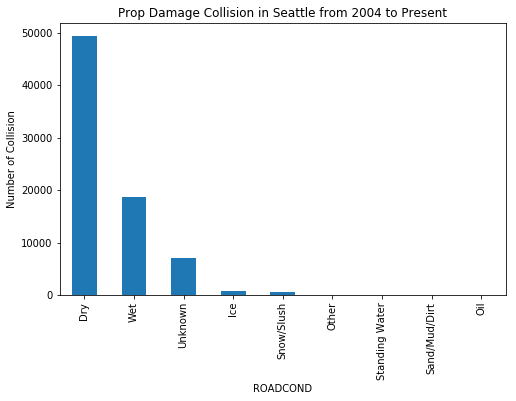

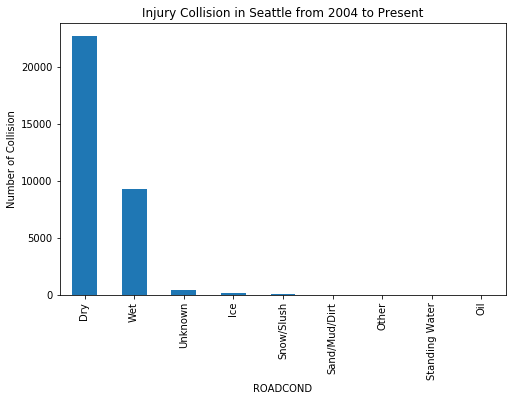

SEVERITYCODE        1      2
ROADCOND                    
Dry             49411  22677
Ice               713    187
Oil                17     15
Other              50     21
Sand/Mud/Dirt      25     21
Snow/Slush        588    111
Standing Water     48     19
Unknown          7114    409
Wet             18711   9285

significance=0.050, p=0.000
Dependent (reject H0)


In [24]:
# ROADCOND

# plot bar chart
df_bar1=df[df['SEVERITYCODE']==1]['ROADCOND'].value_counts(dropna=False)
df_bar1.plot(kind='bar', figsize=(8, 5))
plt.xlabel('ROADCOND') 
plt.ylabel('Number of Collision') 
plt.title('Prop Damage Collision in Seattle from 2004 to Present')
plt.show()

df_bar2=df[df['SEVERITYCODE']==2]['ROADCOND'].value_counts(dropna=False)
df_bar2.plot(kind='bar', figsize=(8, 5))
plt.xlabel('ROADCOND') 
plt.ylabel('Number of Collision') 
plt.title('Injury Collision in Seattle from 2004 to Present')
plt.show()


# Chi-Square Test
data_crosstab = pd.crosstab(df['ROADCOND'],  df['SEVERITYCODE'], margins = False) 
print(data_crosstab) 
print("")

chi2, p_value, dof, ex = stats.chi2_contingency(data_crosstab.to_numpy(),correction=False) 
alpha = 0.05
print('significance=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)') 

The distribution of “ROADCOND” between two “SEVERSITYCODE” are similar.   
It is not clear to determine whether there is a significant relationship between “ROADCOND” and “SEVERSITYCODE”.   
We would also carry out a Chi-Square test to test the independence.  

Chi-Square Test:
* H0: There is no relationship between “ROADCOND” and “SEVERITYCODE”.  
* H1: H0 is not true.  


The result p-value is 0.00 which are less 0.05 significant level.   
We can reject the H0 and conclude that there is a relationship between “ROADCOND” and “SEVERITYCODE”.  

“ROADCOND” will be selected as predictor for model fitting.


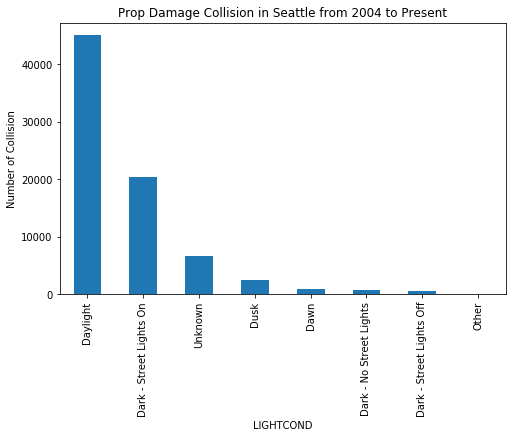

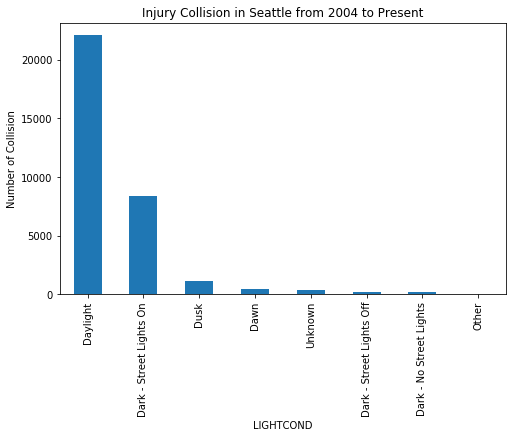

SEVERITYCODE                  1      2
LIGHTCOND                             
Dark - No Street Lights     686    167
Dark - Street Lights Off    539    177
Dark - Street Lights On   20400   8398
Dawn                        920    431
Daylight                  44953  22052
Dusk                       2432   1135
Other                        79     17
Unknown                    6668    368

significance=0.050, p=0.000
Dependent (reject H0)


In [25]:
# LIGHTCOND

# plot bar chart
df_bar1=df[df['SEVERITYCODE']==1]['LIGHTCOND'].value_counts(dropna=False)
df_bar1.plot(kind='bar', figsize=(8, 5))
plt.xlabel('LIGHTCOND') 
plt.ylabel('Number of Collision') 
plt.title('Prop Damage Collision in Seattle from 2004 to Present')
plt.show()

df_bar2=df[df['SEVERITYCODE']==2]['LIGHTCOND'].value_counts(dropna=False)
df_bar2.plot(kind='bar', figsize=(8, 5))
plt.xlabel('LIGHTCOND') 
plt.ylabel('Number of Collision') 
plt.title('Injury Collision in Seattle from 2004 to Present')
plt.show()

# Chi-Square Test
data_crosstab = pd.crosstab(df['LIGHTCOND'],  df['SEVERITYCODE'], margins = False) 
print(data_crosstab) 
print("")

chi2, p_value, dof, ex = stats.chi2_contingency(data_crosstab.to_numpy(),correction=False) 
alpha = 0.05
print('significance=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)') 

The distribution of “LIGHTCOND” between two “SEVERSITYCODE” are similar.   
Both occurrences are occupied by “Daylight” and “Dark – Street Lights On”.   
However, the distribution of the rest of light conditions are slightly different.   
We perform a Chi-Square test to test the independence.  


Chi-Square Test:
* H0: There is no relationship between “LIGHTCOND” and “SEVERITYCODE”.  
* H1: H0 is not true. 

The result p-value is 0.00 which are less 0.05 significant level. 
We can reject the H0 and conclude that there is a relationship between “LIGHTCOND” and “SEVERITYCODE”.   

“LIGHTCOND” will be selected as predictor for model fitting.


## Numeric Variables Study  - Correlation Matrix

In [26]:
df_num=df[['SEVERITYCODE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT']]
df_corr=df_num.corr()
print(df_corr)

# Select variables with high correlation with the target value, PEDCOUNT is selected

              SEVERITYCODE  PERSONCOUNT  PEDCOUNT  PEDCYLCOUNT  VEHCOUNT
SEVERITYCODE      1.000000     0.146343  0.246519     0.201075 -0.072560
PERSONCOUNT       0.146343     1.000000 -0.023524    -0.038817  0.414547
PEDCOUNT          0.246519    -0.023524  1.000000    -0.017453 -0.314730
PEDCYLCOUNT       0.201075    -0.038817 -0.017453     1.000000 -0.295416
VEHCOUNT         -0.072560     0.414547 -0.314730    -0.295416  1.000000


We can find that “PERSONCOUNT”, “PEDCOUNT” and “PEDCYLCOUNT” have positive relationship with the “SEVERITYCODE”. Only “VEHCOUNT” has negative relationship. 
By comparing the magnitude, “PEDCOUNT” and “PEDCYLCOUNT” have a larger correlation with the “SEVERITYCODE”, but they are also correlation to each other. 

To avoid the collinearity problem, we should keep the predictors to be independent to each other and prevent select highly correlated variables in the same model. 

In this case, we would only select “PEDCOUNT” which has the highest correlation value as the predictor.


## Selected Variables

In [27]:
# Select Variable and convert the target variable to flag
df_sel=df[['SEVERITYCODE','COLLISIONTYPE','JUNCTIONTYPE','WEATHER','ROADCOND','LIGHTCOND','PEDCOUNT']]
df_sel['SEVERITY_TARGET']=df_sel['SEVERITYCODE']-1
del df_sel['SEVERITYCODE']
df_sel.head(10)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,COLLISIONTYPE,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,PEDCOUNT,SEVERITY_TARGET
1,Sideswipe,Mid-Block (not related to intersection),Raining,Wet,Dark - Street Lights On,0,0
2,Parked Car,Mid-Block (not related to intersection),Overcast,Dry,Daylight,0,0
4,Angles,At Intersection (intersection related),Raining,Wet,Daylight,0,1
6,Angles,At Intersection (intersection related),Raining,Wet,Daylight,0,0
8,Parked Car,Mid-Block (not related to intersection),Clear,Dry,Daylight,0,0
9,Angles,At Intersection (intersection related),Clear,Dry,Daylight,0,1
11,Angles,At Intersection (intersection related),Clear,Dry,Daylight,0,0
12,Rear Ended,Mid-Block (not related to intersection),Raining,Wet,Dark - Street Lights On,0,0
13,Parked Car,Mid-Block (not related to intersection),Raining,Wet,Dark - No Street Lights,0,0
16,Left Turn,At Intersection (intersection related),Overcast,Dry,Daylight,0,1


For simplicity, the target variable is converted into a flag. 
There are two available values in “SEVERITYCODE”, “1 – prop damage” and “2 – injury”. 

A new flag variable “SEVERITY_TARGET” is created, if the “SEVERITYCODE” equals to “2 – injury”, the “SEVERITY_TARGET” will be set as 1.   
For the rest records, “SEVERITY_TARGET” will be set as 0.

## One Hot Encoding

In [28]:
df_sel_dum = pd.get_dummies(df_sel)
df_sel_dum=pd.DataFrame(df_sel_dum)
df_sel_dum.head()

,PEDCOUNT,SEVERITY_TARGET,COLLISIONTYPE_Angles,COLLISIONTYPE_Cycles,COLLISIONTYPE_Head On,COLLISIONTYPE_Left Turn,COLLISIONTYPE_Other,COLLISIONTYPE_Parked Car,COLLISIONTYPE_Pedestrian,COLLISIONTYPE_Rear Ended,...,ROADCOND_Unknown,ROADCOND_Wet,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
6,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
8,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


## Normalization

In [29]:
y=df_sel_dum['SEVERITY_TARGET']
X=df_sel_dum.drop('SEVERITY_TARGET', axis=1)

In [30]:
from sklearn import preprocessing

X = preprocessing.StandardScaler().fit(X).transform(X)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()


## Data Split - Training Set (80%) and Test Set (20%)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=100)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (87537, 44) (87537,)
Test set: (21885, 44) (21885,)


## Preparation for Oversampling

In [32]:
train_base=pd.DataFrame(X_train)
col_name=np.delete(df_sel_dum.columns,1)
train_base.columns=col_name
train_base['SEVERITY_TARGET']=y_train.to_list()
train_base.head()

,PEDCOUNT,COLLISIONTYPE_Angles,COLLISIONTYPE_Cycles,COLLISIONTYPE_Head On,COLLISIONTYPE_Left Turn,COLLISIONTYPE_Other,COLLISIONTYPE_Parked Car,COLLISIONTYPE_Pedestrian,COLLISIONTYPE_Rear Ended,COLLISIONTYPE_Right Turn,...,ROADCOND_Wet,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown,SEVERITY_TARGET
0,-0.183031,-0.469798,-0.160202,-0.101509,-0.282931,-0.391183,-0.585983,-0.184019,2.138677,-0.125022,...,-0.586363,-0.088638,-0.081158,1.673212,-0.111808,-1.256851,-0.183568,-0.029633,-0.262146,0
1,-0.183031,-0.469798,-0.160202,-0.101509,3.534435,-0.391183,-0.585983,-0.184019,-0.467579,-0.125022,...,-0.586363,-0.088638,-0.081158,-0.597653,-0.111808,0.795640,-0.183568,-0.029633,-0.262146,1
2,-0.183031,2.128575,-0.160202,-0.101509,-0.282931,-0.391183,-0.585983,-0.184019,-0.467579,-0.125022,...,-0.586363,-0.088638,-0.081158,-0.597653,-0.111808,0.795640,-0.183568,-0.029633,-0.262146,0
3,-0.183031,-0.469798,-0.160202,-0.101509,-0.282931,-0.391183,-0.585983,-0.184019,2.138677,-0.125022,...,-0.586363,-0.088638,-0.081158,-0.597653,-0.111808,0.795640,-0.183568,-0.029633,-0.262146,1
4,-0.183031,2.128575,-0.160202,-0.101509,-0.282931,-0.391183,-0.585983,-0.184019,-0.467579,-0.125022,...,1.705429,-0.088638,-0.081158,-0.597653,-0.111808,-1.256851,5.447586,-0.029633,-0.262146,0


In [33]:
# Train set 
counts=train_base['SEVERITY_TARGET'].value_counts(dropna=False)
percent=train_base['SEVERITY_TARGET'].value_counts(dropna=False,normalize=True)
percent100=train_base['SEVERITY_TARGET'].value_counts(dropna=False,normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100})
# Unbalanced training set

,counts,per,per100
0,61304,0.700321,70.0%
1,26233,0.299679,30.0%


## Oversampling - Resample by replacement

In [34]:
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Separate majority and minority classes
df_majority = train_base[train_base['SEVERITY_TARGET']==0]
df_minority = train_base[train_base['SEVERITY_TARGET']==1]

In [35]:
# Upsample minority class
df_minority_upsampled = resample(df_minority, replace=True,n_samples=61304,random_state=100)
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_upsampled['SEVERITY_TARGET'].value_counts()

1    61304
0    61304
Name: SEVERITY_TARGET, dtype: int64

The response records only occupied 30% of the total records.   
To balance the data for model building, the oversampling technique will be applied on the Train set.   

Oversampling will re-sample the minority response records with replacement to up-sample the number of response records to meet the number of majority records.   
This technique can emphasize the characteristics of significant predictors for building model.
 
Oversampling only will be performed on Train set for building a model.   
For the Test set, we will keep its original distribution for accurate model performance evaluation.  

## Model Fitting

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Separate input features (X) and target variable (y)
y_train = df_upsampled['SEVERITY_TARGET']
X_train = df_upsampled.drop('SEVERITY_TARGET', axis=1)

# Train model
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

Logistic regression is a machine learning algorithm to model the probability of the respond records.   
The predicted probability is between 0 and 1. It can be used in classification problem.   

If it is larger than 0.5, we would classify the prediction would be “Will be happened”.  
If the predicted value is smaller then 0.5, the prediction would be “Will not be happened”.  

The threshold value 0.5 can be adjusted based on the business problem’s objectives. 

## Model Evaluation - Accuracy Score

In [37]:
yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)

# Accuracy
print( 'Accuracy Score = ' + str(accuracy_score(y_test, yhat)) )

Accuracy Score = 0.6721041809458533


The accuracy score is 0.6721 which means that the 67% of the response records are correctly predicted.

## Model Evaluation - Confusion Matrix

In [38]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[5087 1425]
 [5751 9622]]


Confusion matrix, without normalization
[[5087 1425]
 [5751 9622]]


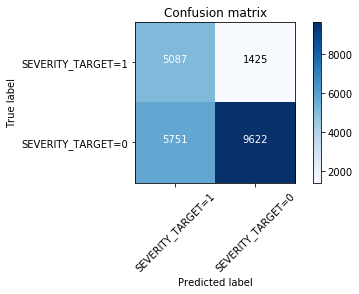

In [39]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['SEVERITY_TARGET=1','SEVERITY_TARGET=0'],normalize= False,  title='Confusion matrix')

From the confusion matrix, we can know the proportion of false positive and false negative records.   
In this case 0.5 threshold is used, there are 5751 records are false positive and 1425 records are false negative.  

Since our project aims is to predict the occurrence of high severity level accident and prevent users suffer from traffic congestion, the false negative should be reduced.   
The false negative records occupy 6.51% (1425) of the Test set which are acceptable. 



## Model Evaluation - Area under ROC 

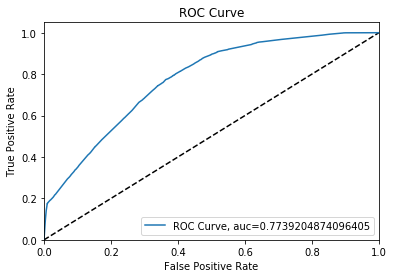

In [40]:
from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(y_test,  yhat_prob[::,1])
auc = metrics.roc_auc_score(y_test, yhat_prob[::,1])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.plot(fpr,tpr,label="ROC Curve, auc="+str(auc))
plt.legend(loc=4)
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# AUC=0.77

The area under ROC curve (AUC) measure how well the model can distinguish between the response.  
The higher the AUC, the better the model predictive power. 

The AUC=0.7739 means 77.39% that the model will be able to distinguish response.

# Discussion

In the project, we use oversampling to balance the data which can avoid the information loss of the response records.   
However, there are some disadvantage of this method. Oversampling will up-sample the minority response records which would increase the likelihood of overfitting.   
Beside oversampling, there are other technique to handle the unbalanced data. 
For example, undersample the majority class, use penalize algorithms to increase the cost of classification mistakes on the minority class, use Tree-based algorithm etc. They are also good methods to tackle the unbalanced data. 

In this section, we will try decision tree to explore whether the model performance can be improved or not.   
Decision trees normally will have better performance on unbalanced data because the hierarchical structure of tree-based algorithms can learn from both minority and majority classes.


### Decision Tree

In [41]:
tree_base=df_sel.copy()
tree_y=tree_base['SEVERITY_TARGET']
tree_X=tree_base.drop('SEVERITY_TARGET', axis=1)
tree_X.head()


,COLLISIONTYPE,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,PEDCOUNT
1,Sideswipe,Mid-Block (not related to intersection),Raining,Wet,Dark - Street Lights On,0
2,Parked Car,Mid-Block (not related to intersection),Overcast,Dry,Daylight,0
4,Angles,At Intersection (intersection related),Raining,Wet,Daylight,0
6,Angles,At Intersection (intersection related),Raining,Wet,Daylight,0
8,Parked Car,Mid-Block (not related to intersection),Clear,Dry,Daylight,0


### Label Encoding

In [42]:
from sklearn import preprocessing

COLLISIONTYPE_list = sorted(list(set(tree_X['COLLISIONTYPE'])))
le_COLLISIONTYPE = preprocessing.LabelEncoder()
le_COLLISIONTYPE.fit(COLLISIONTYPE_list)
tree_X['COLLISIONTYPE'] = le_COLLISIONTYPE.transform(tree_X['COLLISIONTYPE']) 

JUNCTIONTYPE_list = sorted(list(set(tree_X['JUNCTIONTYPE'])))
le_JUNCTIONTYPE = preprocessing.LabelEncoder()
le_JUNCTIONTYPE.fit(JUNCTIONTYPE_list)
tree_X['JUNCTIONTYPE'] = le_JUNCTIONTYPE.transform(tree_X['JUNCTIONTYPE']) 

WEATHER_list = sorted(list(set(tree_X['WEATHER'])))
le_WEATHER = preprocessing.LabelEncoder()
le_WEATHER.fit(WEATHER_list)
tree_X['WEATHER'] = le_WEATHER.transform(tree_X['WEATHER'])

ROADCOND_list = sorted(list(set(tree_X['ROADCOND'])))
le_ROADCOND = preprocessing.LabelEncoder()
le_ROADCOND.fit(ROADCOND_list)
tree_X['ROADCOND'] = le_ROADCOND.transform(tree_X['ROADCOND'])

LIGHTCOND_list = sorted(list(set(tree_X['LIGHTCOND'])))
le_LIGHTCOND = preprocessing.LabelEncoder()
le_LIGHTCOND.fit(LIGHTCOND_list)
tree_X['LIGHTCOND'] = le_LIGHTCOND.transform(tree_X['LIGHTCOND'])

tree_X.head()

,COLLISIONTYPE,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,PEDCOUNT
1,9,4,5,8,2,0
2,5,4,4,0,4,0
4,0,1,5,8,4,0
6,0,1,5,8,4,0
8,5,4,1,0,4,0


In [43]:
from sklearn.model_selection import train_test_split

tree_X_trainset, tree_X_testset, tree_y_trainset, tree_y_testset = train_test_split(tree_X, tree_y, test_size=0.2, random_state=100)
print(tree_X_trainset.shape)
print(tree_X_testset.shape)

(87537, 6)
(21885, 6)


In [44]:
from sklearn.tree import DecisionTreeClassifier

SEVERITY_Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
SEVERITY_Tree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [45]:
SEVERITY_Tree.fit(tree_X_trainset,tree_y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [46]:
predTree = SEVERITY_Tree.predict(tree_X_testset)

### Evaluation

In [50]:
from sklearn import metrics
import matplotlib.pyplot as plt

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(tree_y_testset, predTree))

DecisionTrees's Accuracy:  0.7480009138679461


The accuracy is 0.7480 which means 74% of the response records can be correctly identified.     
The result is better than the logistic regression with 0.5 as the threshold value.   

Since the project aims to predict the probability of the occurrence high severity level accident.   
Logistic regression can provide the predicted probability and users can adjust the threshold to decrease the false negative percentage until an acceptable level.  
Logistic regression is more preferred under this situation.  


# Conclusion

In this study, we have explored the collision data from Seattle and successfully built a logistic regression model to predict the occurrence of the high severity level accident. 
In the process, we use correlation matrix and chi-square test of independent to select significant numeric and categorical variable. Also, we oversample technique to balance the dataset before model training. 

The result model can achieve 67% accuracy with only 6.51% false negative rate.  
The performance indicates that the model is sufficient to help drivers to avoid traffic congestion caused by high severity level road accident. 